<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

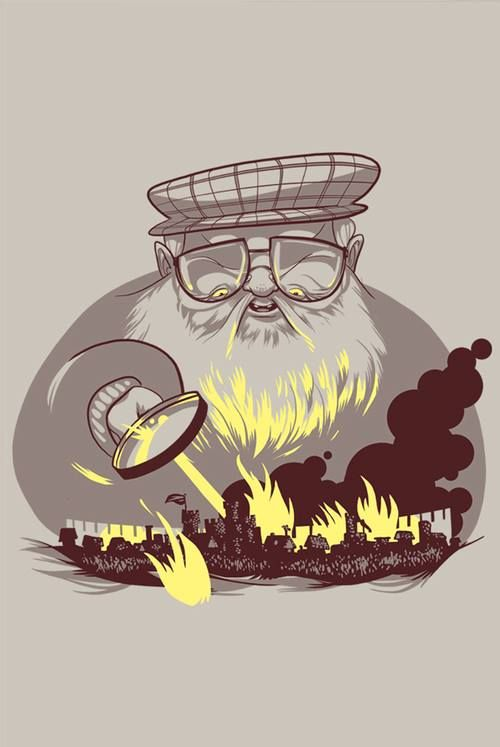

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [3]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /Users/qkywert/game_of_thrones_test.csv
100%|██████████████████████████████████████| 37.3k/37.3k [00:00<00:00, 1.44MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /Users/qkywert/game_of_thrones_train.csv
100%|█████████████████████████████████████████| 138k/138k [00:00<00:00, 612kB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
data


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [7]:
for column in data.select_dtypes(include=['number']).columns:
    data.fillna({column: data[column].median()}, inplace=True)

for column in data.select_dtypes(include=['object']).columns:
    data.fillna({column: 'Unknown'}, inplace=True)

In [8]:
for column in data_test.select_dtypes(include=['number']).columns:
    data_test.fillna({column: data[column].median()}, inplace=True)


for column in data_test.select_dtypes(include=['object']).columns:
    data_test.fillna({column: 'Unknown'}, inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [9]:
data['isPopular'] = (data['popularity'] >= 0.5).astype(int)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

In [10]:
data_test['isPopular'] = (data_test['popularity'] >= 0.5).astype(int)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)

In [11]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles','Summer Islander','Summer Islands',],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis','Ghiscaricari'],
    'Asshai': ["asshai'i", 'asshai','Asshai'],
    'Lysene': ['lysene', 'lyseni','Lyseni'],
    'Andal': ['andal', 'andals','Andals'],
    'Braavosi': ['braavosi', 'braavos','Braavosi','Braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish','Dorne','Dornishmen'],
    'Myrish': ['myr', 'myrish', 'myrmen','Myrish'],
    'Westermen': ['westermen', 'westerman', 'westerlands','Westerman','Westermen'],
    'Westerosi': ['westeros', 'westerosi','Westeros'],
    'Stormlander': ['stormlands', 'stormlander','Stormlands'],
    'Norvoshi': ['norvos', 'norvoshi','Norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk','Free folk','Wildling','First men','First Men'],
    'Qartheen': ['qartheen', 'qarth','Qartheen','Qarth'],
    'Reach': ['the reach', 'reach', 'reachmen','The Reach','Reachmen'],
    'Vale': ['Valemen', 'Vale mountain clans', 'Vale'],
    'Ironborn': ['Ironborn', 'ironborn'],
    'Lhazareen': ['Lhazareen', 'Lhazarene'],
}

In [12]:
data['culture']=data['culture'].str.lower()
data_test['culture']=data_test['culture'].str.lower()

In [13]:
for new_culture, old_culture in cult.items():
    data['culture'] = data['culture'].replace(old_culture, new_culture)

In [14]:
for new_culture, old_culture in cult.items():
    data_test['culture'] = data_test['culture'].replace(old_culture, new_culture)

In [15]:
data['culture']=data['culture'].str.lower()
data_test['culture']=data_test['culture'].str.lower()

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [16]:
data['isAliveHeir'].value_counts()

isAliveHeir
1.0    1550
0.0       7
Name: count, dtype: int64

In [17]:
data['mother'].value_counts()

mother
Unknown                   1539
Rhaenyra Targaryen           2
Cersei Lannister             2
Mariah Martell               1
Betha Blackwood              1
Lady of House Sunderly       1
Naerys Targaryen             1
Daenaera Velaryon            1
Shaera Targaryen             1
Alicent Hightower            1
Rhaenys Targaryen            1
Valaena Velaryon             1
Cassana Estermont            1
Catelyn Stark                1
Visenya Targaryen            1
Alyssa Targaryen             1
Alyssa Velaryon              1
Name: count, dtype: int64

In [18]:
data['father'].value_counts()

father
Unknown                   1535
Daemon Targaryen             2
Robert Baratheon             2
Aegon I Targaryen            2
Brandon Stark                1
Aenys I Targaryen            1
Aegon V Targaryen            1
Qhorwyn Hoare                1
Quellon Greyjoy              1
Aegon IV Targaryen           1
Aegon III Targaryen          1
Daeron II Targaryen          1
Jaehaerys II Targaryen       1
Viserys I Targaryen          1
Aerion Targaryen             1
Tristifer IV Mudd            1
Steffon Baratheon            1
Eddard Stark                 1
Baelon Targaryen             1
Halleck Hoare                1
Name: count, dtype: int64

In [19]:
data['isAliveFather'].value_counts()

isAliveFather
0.0    1552
1.0       5
Name: count, dtype: int64

In [20]:
data['spouse'].value_counts()

spouse
Unknown                1357
Walder Frey               6
Craster                   4
Viserys I Targaryen       2
Kiera of Tyrosh           2
                       ... 
Hosteen Frey              1
Jyanna Frey               1
Leobald Tallhart          1
Lorra Royce               1
Davos Seaworth            1
Name: count, Length: 187, dtype: int64

In [21]:
data[['isAliveHeir', 'isAlive']].groupby(['isAlive'], as_index=False).mean()

,isAlive,isAliveHeir
0,0,0.97971
1,1,1.00000


In [22]:
data[['popularity', 'isAlive']].groupby(['isAlive'], as_index=False).mean()

,isAlive,popularity
0,0,0.106577
1,1,0.049825


In [23]:
data.drop(columns=['title','name','isAliveHeir','father','mother','house','popularity','numDeadRelations','isAliveFather','spouse','heir','isAliveMother','isAliveSpouse','isMarried'], inplace = True)

In [24]:
data_test.drop(columns=['title','name','isAliveHeir','father','mother','house','popularity','numDeadRelations','isAliveFather','spouse','heir','isAliveMother','isAliveSpouse','isMarried'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [25]:
data.columns

Index(['male', 'culture', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4',
       'book5', 'isNoble', 'age', 'isAlive', 'isPopular', 'boolDeadRelations'],
      dtype='object')

In [26]:
data['isAlive'].dtypes

dtype('int64')

In [27]:
data['isAlive'].unique()

array([0, 1])

#### Признак категориальный

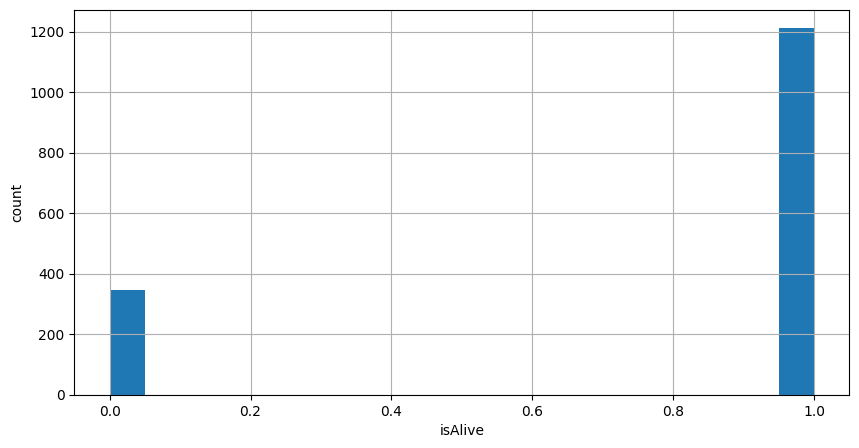

In [28]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [29]:
categorical_columns = ['culture', 'book1','book2','book3','book4','book5', 'isNoble','isPopular','boolDeadRelations']

In [30]:
categorical_features = data[categorical_columns]

In [31]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

In [32]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index
                          )

In [33]:
# Concatenate the one-hot encoded dataframe with the original dataframe
data_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
data_encoded = data_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
data = data_encoded

In [34]:
categorical_features = data_test[categorical_columns]

one_hot_encoded = encoder.transform(data_test[unprocessed_cat_features])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data_test.index
                          )
data_encoded = pd.concat([data_test, one_hot_df], axis=1)

data_encoded = data_encoded.drop(unprocessed_cat_features, axis=1)

data_test = data_encoded

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

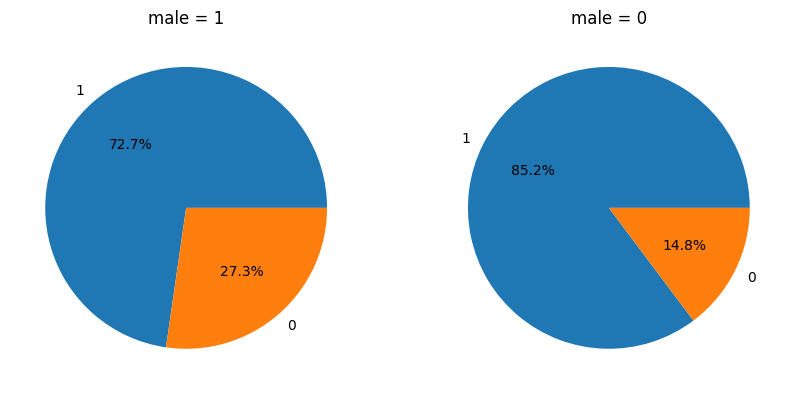

In [35]:
data1 = data[data['male'] == 1]['isAlive'].value_counts()
data2 = data[data['male'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("male = 1")
ax2.set_title("male = 0")

plt.show()

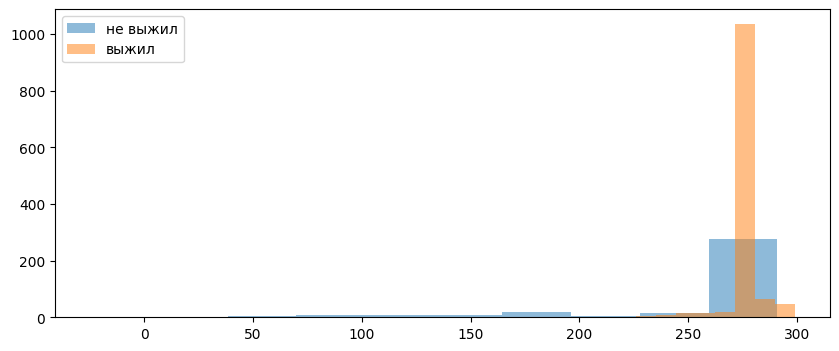

In [36]:
plt.figure(figsize=(10, 4))

plt.hist(data['dateOfBirth'][data['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(data['dateOfBirth'][data['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [37]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [40]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [41]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [42]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1,max_iter=3000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [43]:
# Шаг 1. создание модели
svc = SVC(kernel='linear', C=1.0, random_state=42)
# Шаг 2. обучение модели
svc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_svc = svc.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [44]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [45]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8141


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [46]:
# Шаг 3. Предсказание на тестовых данных
y_pred_svc = svc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [47]:
y_pred = logistic_regression.predict(data_test)

/opt/homebrew/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [48]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /Users/qkywert/submission.csv
100%|███████████████████████████████████████| 2.74k/2.74k [00:00<00:00, 124kB/s]


In [49]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [50]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [51]:
submission['isAlive'] = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [52]:
submission.to_csv("new_submission.csv", index=False)